<center><h1>Making Merger Tree from m3p output</h1></center>

In [1]:
import numpy as np
from m3p_merger import m3p_merger
import matplotlib.pyplot as plt

import sys

sys.path.insert(0,r'..')
from utils import ParamsFile, HaloReader


### Define m3p data path

This directory should contain a folder of m3p input files called 'inputs' and a folder of m3p output files called 'axOut'.

We also define here the m3p inputs file for while we want to build our merger tree.

In [21]:
m3p_data_path = r"C:\Users\david\AxionData\PeakPatch\m3p_merger"

ppFile = "inputs.ax_jan5_stitched"

### Make list of all peaks
MakePeakList returns 1D array of length equal to the number of redshift outputs and the comoving boxsize. Each element of the array is an additional array of all of the peak properties in *Lagrangian* (unperturbed) coordinates for a given redshift output.

Each of these nested arrays stores the (x, y, z) coordinates [cMpc], radius [cMpc] and mass [Msol] of each peak. It therefore has a (5, N) shape where N is the number of peaks at this snapshot. 

For example: `peak_list[10][:,145]` will return the properties (x, y, z, radius, mass) for the 145th halo in the 10th redshift snapshot.

In [22]:
p = ParamsFile(m3p_data_path + "\inputs/" + ppFile)
redshifts = p["redshifts"] 

peak_list, boxsize = m3p_merger.MakePeakList(ppFile, printOutput = True)

	Loading file (100 of 100): C:\Users\David\AxionData/PeakPatch/m3p_merger/axOut/jan5/jan5_stitched_final_halos_99.hdf5


## Num halo check

We see that, as expected, the number of halos begins very small then rises as linearly evolved overdensities grow and the collapse threshold falls. The number of halos peaks at around matter-radiation equality and then falls again as these halos merge together into a smaller number of larger final halos.

(1000000.0, 99.0)

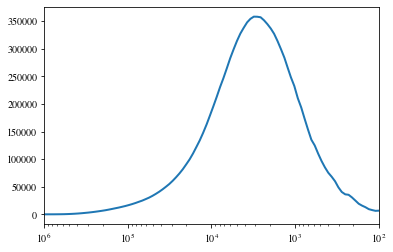

In [23]:
# Calculate number of peaks at each redshift
numHalos = [len(peak_list[i][0]) for i in range(len(peak_list_main))]

plt.semilogx(redshifts, numHalos, lw = 2)
plt.xlim([max(redshifts), min(redshifts)])
plt.xlabel("Redshift")
plt.ylabel("Number of halos")

### Total mass check

We could similarly choose to look at the total mass of collapsed objects in our box


Text(0, 0.5, 'Total Mass [$M_{\\odot}$]')

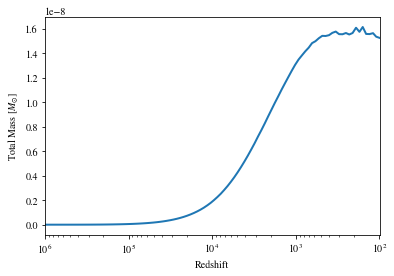

In [26]:
totalMass = [sum(peak_list[i][4,:]) for i in range(len(peak_list_main))]
plt.semilogx(redshifts, totalMass, lw = 2)
plt.xlim([max(redshifts), min(redshifts)])
plt.xlabel("Redshift")
plt.ylabel("Total Mass [$M_{\odot}$]")

In [24]:
out = m3p_merger.BuildMergerTree2(peak_list_main, ppFile, final_halos_indicies = 100)

<h2><center>Find which trees are interesting</center></h2>

In [10]:
for i in range(len(out)):
    mass = out[i][0][0][-1]
    mask = (mass>1e-12)*(mass<1e-11)
    if mask:
        print(i, end = ' ')
    

140 185 310 328 488 806 889 940 1025 1050 1119 1189 1201 1255 1366 1373 1388 1415 1469 1511 1590 1738 1903 1996 2153 2261 2278 2453 2517 2563 2664 2708 2713 2804 2898 2925 2941 2958 2981 3006 3034 3119 3154 3194 3243 3268 3436 3459 3461 3485 3522 3607 3731 3808 3846 3912 4162 4208 

<h2><center>Calculate Merger Tree</center></h2>

In [60]:
#peak_list_main, boxsize = m3p_merger.MakePeakList(ppFile,startIndex = 0, massType = "unstripped")
out = m3p_merger.BuildMergerTree2(peak_list_main, ppFile, final_halos_indicies = 71781)
#np.save("./FinalGraphs/Data/MergerTreeExample.npy",out[0])

<h2><center>Plot all peaks on each other</center></h2>

In [20]:
#out = m3p_merger.BuildMergerTree(peak_list, ppFile, final_halos_indicies = 797, printOutput = True)
#m3p_merger.plotMergerPatches(out[0], ppFile, cmap = "viridis")

<h2><center>Plot merger tree</center></h2>

In [ ]:
importlib.reload(m3p_merger)
ppFile = "findDwarfs/inputs.ax_findDwarfs_stitched"
max_mass = None#5e-11
max_radius = None # 5e-8

indicies = [71781]

for index in indicies:
    # Plot merger tree using 'unstripped' mass
    peak_list_main, boxsize = m3p_merger.MakePeakList(ppFile, massType = "unstripped")
    out2 = m3p_merger.BuildMergerTree2(peak_list_main, ppFile, final_halos_indicies = index)
    fig = m3p_merger.plotMergerTree(out2[0], ppFile, font_size = 16, log = True,
                              colorbar=True, colorbar_title = "Mass [$M_{\odot}$]",
                                    min_mass=1e-15,max_mass = max_mass, 
                                    max_radius = max_radius, cmap = "plasma_r")
    plt.show()
#np.save("./FinalGraphs/Data/MergerTreeExample.npy",out2)

<h3>Checking Progenitor mass calculation</h3>

Text(0.5, 0, 'Redshift, $z$')

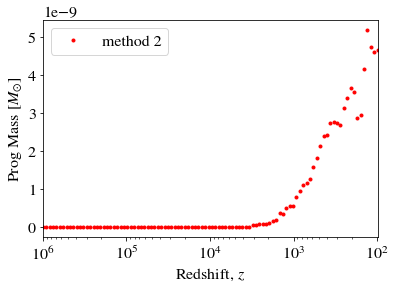

In [30]:
importlib.reload(m3p_merger)
ppFile = "inputs.ax_stitched"

halo_index = 2

f = 0.01

peak_list_main, boxsize = m3p_merger.MakePeakList(ppFile,startIndex = 0, massType = "unstripped")
out = m3p_merger.BuildMergerTree2(peak_list_main, ppFile, final_halos_indicies = halo_index)
zCol, ProgMass, z = m3p_merger.FindCollapseRedshift(out[0], f, ppFile,startIndex = 0, interp = "None")
plt.semilogx(z, ProgMass, 'r.', ms=6, label ="method 2")

plt.legend(loc=2)
plt.xlim(max(z), min(z))
plt.ylabel("Prog Mass [$M_{\odot}$]")
plt.xlabel("Redshift, $z$")

#np.save("./FinalGraphs/Data/MassGrowth.npy", [z, ProgMass, zCol])

In [18]:
peak_list_main[0][:,0]

array([2.9541017e-10, 3.1697510e-07, 2.7916261e-07, 2.2761135e-09,
       4.2784176e-15], dtype=float32)